# Virtual4C

In [1]:
import sys
sys.path.append('/Users/yuanzan/Documents/github/seqyuan/trackc/src')
import trackc as tc
import cooler
import pandas as pd

In [ ]:
!wget https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM4604287&format=file&file=GSM4604287%5F1360%2Eiced%2Emcool

In [2]:
cooler.fileops.list_coolers('GSM4604287_1360.iced.mcool')

['/resolutions/10000',
 '/resolutions/20000',
 '/resolutions/40000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000']

## Virtual4C types
Virtual4C support 3 visualization types
* line
* bar
* heatmap

no max min range
maxrange: 18.039999999999964 minrange: 1.0
no max min range
maxrange: 18.039999999999964 minrange: 1.0
no max min range
maxrange: 18.039999999999964 minrange: 1.0


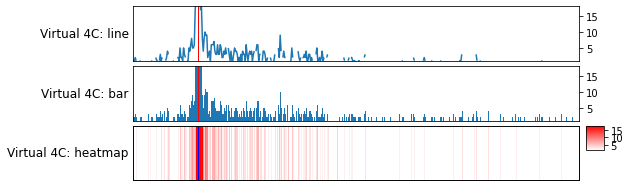

In [2]:
AML_1360 = cooler.Cooler('./GSM4604287_1360.iced.mcool::/resolutions/10000')

regions = ['chr8:127000000-129200000', 'chr14:96500000-99300000']
MYC_TSS = 'chr8:127735434-127735435'

aml = tc.tl.extractContactRegions(clr=AML_1360, row_regions=regions)

ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=1, hspace=0.1)
ten.add(pos='bottom', height=1, hspace=0.1)
ten.add(pos='bottom', height=1, hspace=0.1)

tc.pl.virtual4C(ax=ten.axs(0), clr=AML_1360, target=MYC_TSS, contact_regions=regions, 
                track_type='line', label='Virtual 4C: line', target_color='r')

tc.pl.virtual4C(ax=ten.axs(1), clr=AML_1360, target=MYC_TSS, contact_regions=regions, 
                track_type='bar', label='Virtual 4C: bar', target_color='r')

aa = tc.pl.virtual4C(ax=ten.axs(2), clr=AML_1360, target=MYC_TSS, contact_regions=regions, 
                     track_type='heatmap', label='Virtual 4C: heatmap', target_color='b')


## Virtual4C example
Here is a Virtual4C and multi-omics figure from  **xu_subtype-specific_2022** Fig.4b

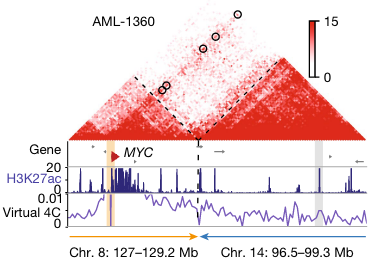

### Download data

In [ ]:
!wget https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSM4604189&format=file&file=GSM4604189%5F1360%5FCUT%5FTAG%5FH3K27ac%2EMACS2%2Enodup%5Fx%5Fctl%2Epval%2Esignal%2Ebigwig

In [3]:
gene_bed12 = pd.read_table('./Homo_sapiens.GRCh38.105.chr.bed13', header=None)
gene_bed12 = gene_bed12[gene_bed12[12]=="protein_coding"]
gene_bed12[0] = 'chr' + gene_bed12[0]

import pyBigWig
AML_1360_H3K27ac = pyBigWig.open('./GSM4604189_1360_CUT_TAG_H3K27ac.MACS2.nodup_x_ctl.pval.signal.bigwig')


maxrange: 15 minrange: 0
maxrange: 10 minrange: 1.0


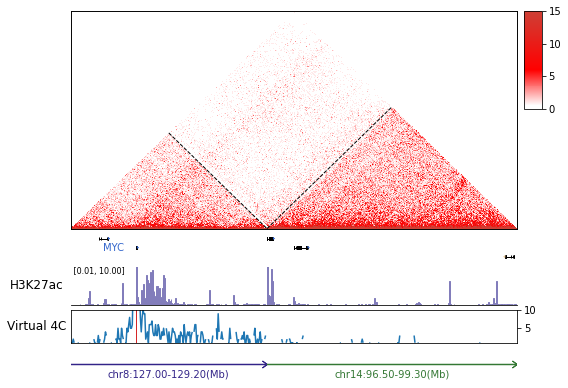

In [7]:
ten = tc.tenon(width=8, height=1)
ten.add(pos='bottom', height=4)
ten.add(pos='bottom', height=0.5, hspace=0.1)
ten.add(pos='bottom', height=0.7, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)
ten.add(pos='bottom', height=0.6, hspace=0.1)

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fruitpunch3 = LinearSegmentedColormap.from_list('fruitpunch3', 
                                             [(0, 'white'),
                                              (0.03, 'w'),
                                              (0.4, 'r'),
                                              (1, '#CF3F35')], N=100)


aml = tc.tl.extractContactRegions(clr=AML_1360, row_regions=regions)
tc.pl.mapC(ax=ten.axs(0), mat=aml.cmat, maxrange=15,minrange=0, cmap=fruitpunch3,
           logdata=False, map_type='triangle', symmetric=False)
tc.pl.mapc_markline(ax=ten.axs(0), row_regions=aml.row_regions, map_type='triangle',
                    binsize=20000, map_order=0, symmetric=False, show_regions_edge=True)

tc.pl.gene_track(ax=ten.axs(1), bed12=gene_bed12, regions=regions, line=3, gene_fontszie=10, show_label=['MYC'])
tc.pl.bw_track(AML_1360_H3K27ac, ten.axs(2), regions=regions, ymax=10, label='H3K27ac', binsize=10000, invert_y=False)

tc.pl.virtual4C(ax=ten.axs(3), clr=AML_1360, target=MYC_TSS, contact_regions=regions, maxrange=10,
                target_color='tab:red', track_type='line', label='Virtual 4C')

tc.pl.multi_scale_track(ten.axs(4), regions=regions, scale_adjust='Mb', intervals=1, tick_rotation=0, tick_fontsize=10)